WORKFLOW OF THE PROJECT

* Data Collection - https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data
* Data Preprocessing
* Data Analysis
* Train Test Split
* Random Forest Regression Algorithm

Importing the required libraries for the task

In [1]:
import numpy as np  #to convert data into numpy arrays
import pandas as pd #for data pre-processing technique and importing our data
import matplotlib.pyplot as plt #for creating data visualizations to explore the data
import seaborn as sns #for making such visualizations and creating plots
from sklearn.model_selection import train_test_split #to divide our original data into training data and testing data
from sklearn.ensemble import RandomForestRegressor #to build our regression type ml model 
from sklearn import metrics #to evaluate the accuracy of our ml model

Data Collection and processing

In [2]:
#loading the dataset into a variable data and printing the first 5 values
data = pd.read_csv('D:\Machine Learning with Python\Gold Prediction using Python\gld_price_data.csv')
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
data.shape

(2290, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


From the above info, we can say that there is no missing data in the dataset and hence doesn't need much Data Preprocessing.

In [6]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation between various types of datasets


1. Postive Correlation - When two columns of a dataset are directly proportional to each other.
2. Negative Correlation - When two columns of a dataset are indirectly proportional to each other.

Creating a heatmap to understand the correlation between different columns

In [8]:
correlation = data.corr()

<AxesSubplot:>

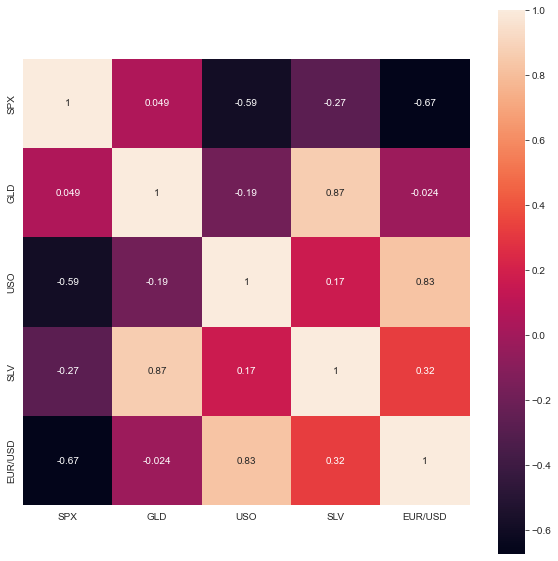

In [9]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, annot=True)

In [10]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

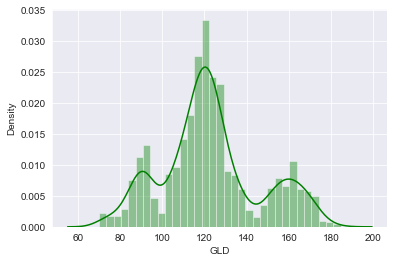

In [11]:
sns.distplot(data['GLD'],color='green')

In [12]:
X = data.drop(['Date','GLD'],axis=1)
Y = data['GLD']

In [13]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Train Test Split Data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [16]:
regressor = RandomForestRegressor(n_estimators=100)

In [17]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [18]:
test_data_prediction = regressor.predict(X_test)

In [19]:
print(test_data_prediction)

[168.25249941  82.1239997  115.79300039 127.75200054 120.59920138
 154.70329743 150.58369808 126.2130001  117.54259851 126.04730083
 116.82720105 172.03890062 141.65299913 167.98119857 115.33880058
 117.51320035 138.70040327 169.54529989 159.13770344 157.52139914
 155.13820078 125.08249994 176.23309946 156.85090364 125.19240051
  93.8252999   78.3565997  120.79639983 119.09669951 167.46839997
  88.20780066 125.37040053  91.07560097 117.57950037 121.01909918
 136.58870035 115.41640119 115.07370103 148.07599992 106.91190086
 104.61720229  87.22389786 126.51000077 118.1599003  152.86439894
 119.64019986 108.36540021 107.95499794  93.0961     127.13409781
  74.95430027 113.69709909 121.43889994 111.41759937 118.92019925
 120.80949911 158.87769952 167.22290159 146.86669645  85.87879878
  94.41080038  86.9451987   90.5184002  119.01700089 126.40520099
 127.6541004  170.84510018 122.32349942 117.54329876  98.39570015
 167.5890012  142.75439781 131.99800273 121.11480217 121.43759936
 119.67060

Evaluation of performance of the model

In [20]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)

In [21]:
print('R squared error : ',error_score)

R squared error :  0.9889998298306205


Taking in consideration that our dataset has values in the range of 100s, 0.98 "R squared error" is really less and our model is performing well

Compare actual values and predicted values

In [22]:
Y_test = list(Y_test)

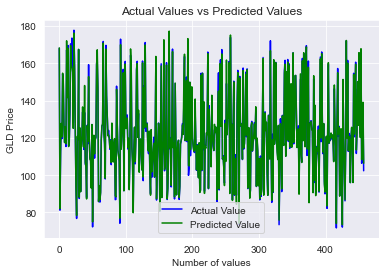

In [23]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Values vs Predicted Values')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

Saving the model

In [24]:
import pickle

In [28]:
filename = 'gold_price_predictor.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [29]:
loaded_model = pickle.load(open('gold_price_predictor.sav','rb'))

In [30]:
input_data = (1447.160034,78.470001,15.18,1.471692)

In [31]:
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

print('Gold Price according to the input data : ',prediction)

[85.08420013]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [32]:
for columns in X.columns:
    print(columns)

SPX
USO
SLV
EUR/USD
